# Gait Cycle Symmetry Analysis
Use DTW to calculate the symmetry indices of the left swing and right swing in a walk cycle

In [181]:
# load skeleton from skeleton dataset pkl
import pickle

# TODO：这个里面的结果不准备，需要更准确的才行
with open("/workspace/data/seg_skeleton_pkl/whole_annotations.pkl", "rb") as f:
	skeleton = pickle.load(f)

In [182]:
skeleton['annotations'][0].keys()	

dict_keys(['keypoint', 'keypoint_score', 'frame_dir', 'img_shape', 'original_shape', 'total_frames', 'label'])

In [183]:
# 根据文件名来寻找对应的骨骼数据，用来画图
target = '20170411_DHS_lat_V1-0003'

for one_smaple in skeleton['annotations']:

	keypoint = one_smaple['keypoint']
	key_score = one_smaple['keypoint_score']
	frame_dir = one_smaple['frame_dir']
	label = one_smaple['label']

	if target in frame_dir:
		# print(one_smaple)
		break;

# 加载视频帧信息
from torchvision.io import read_video

vframes, _, info = read_video(frame_dir)

In [184]:
# 加载gait cycle index的信息
import json
from pathlib import Path

video_name = frame_dir.split('/')[-1].replace('.mp4', '.json')
raw_path = Path("/workspace/data/segmentation_dataset_512/json_mix/")
t_path = list(raw_path.glob(f'**/*{video_name}'))[0]

# mix method
with open(t_path, "r") as f:
    mix_method = json.load(f)

print(f'find json path: {t_path}')
print(f'mix method: {mix_method["gait_cycle_index"]}')

find json path: /workspace/data/segmentation_dataset_512/json_mix/DHS/20170411_DHS_lat_V1-0003.json
mix method: [0, 11, 22, 33, 44, 55, 69, 82, 98, 111, 124]


In [185]:
# 确保加载的keypoint和视频帧数量一致
vframes.shape, keypoint.shape[1]

(torch.Size([128, 512, 512, 3]), 128)

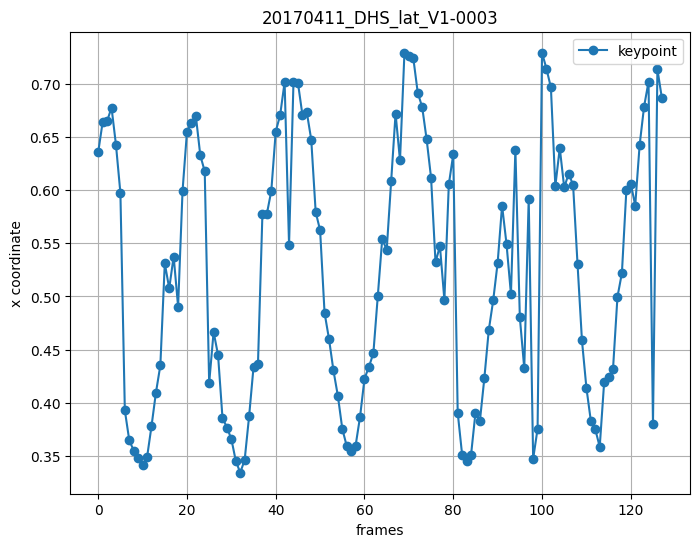

In [186]:
# 根据关节点的x轴坐标画图
import matplotlib.pyplot as plt

y = keypoint[0,:,16,0]
x = [i for i in range(len(y))]

# 创建图形和轴
plt.figure(figsize=(8, 6))

# 画曲线图
plt.plot(x, y, label='keypoint', marker='o')

# 添加标题和标签
plt.title(f"{video_name.split('.')[0]}")
plt.xlabel('frames')
plt.ylabel('x coordinate')

# 添加网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [187]:
import numpy as np
from dtw import *
import matplotlib.pyplot as plt


for i in range(0, len(mix_method['gait_cycle_index'])-2, 2):

	stance_phase_keypoint = keypoint[0, mix_method['gait_cycle_index'][i]:mix_method['gait_cycle_index'][i+1], 15, 0]
	swing_phase_keypoint = 1 - keypoint[0, mix_method['gait_cycle_index'][i+1]:mix_method['gait_cycle_index'][i+2], 15, 0]
	
	# 计算 DTW 距离
	manhattan_distance = lambda x, y: np.abs(x - y)

	d, cost_matrix, acc_cost_matrix, path = dtw(stance_phase_keypoint, swing_phase_keypoint, dist=manhattan_distance)

	# 打印 DTW 距离
	print(d)

	#  You can also visualise the accumulated cost and the shortest path
	# plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
	# plt.plot(path[0], path[1], 'w')
	# plt.show()

1.2628324627876282
0.6895767450332642
0.7512586116790771
0.9483341872692108
1.4263009428977966
